In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

In [2]:
#Load the dataset
autism_df=pd.read_csv('/content/dataset (1).csv')

In [3]:
autism_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [4]:
#Cleaning data
autism_df.replace('?',np.nan,inplace=True)

In [5]:
autism_df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class_ASD           0
dtype: int64

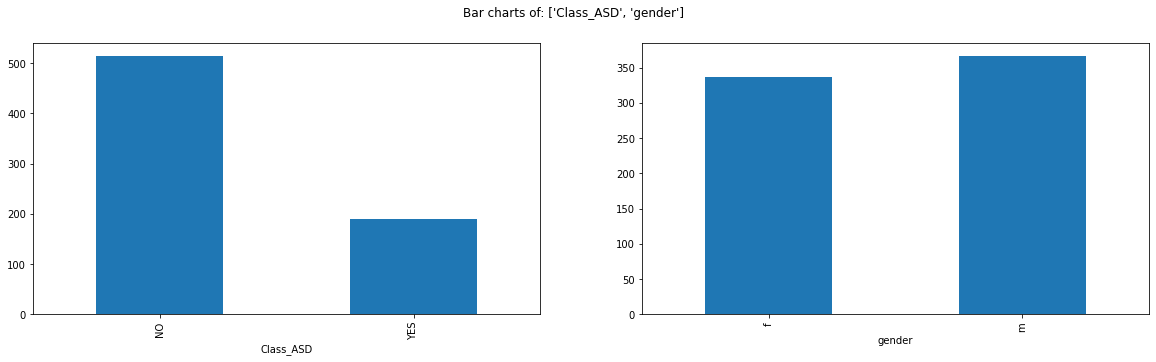

In [6]:
autism_df['Class_ASD'] = autism_df['Class_ASD'].replace(['YES}'],'YES')
import matplotlib.pyplot as plt
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
PlotBarCharts(inpData=autism_df, colsToPlot=['Class_ASD','gender'])

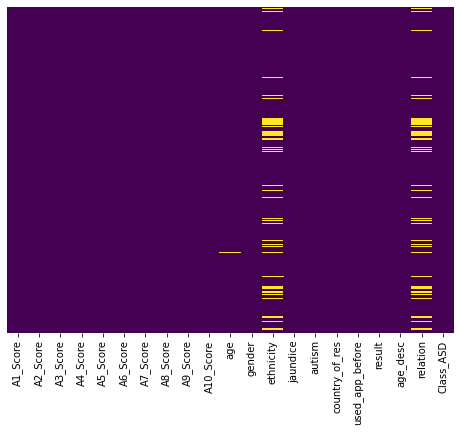

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(autism_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

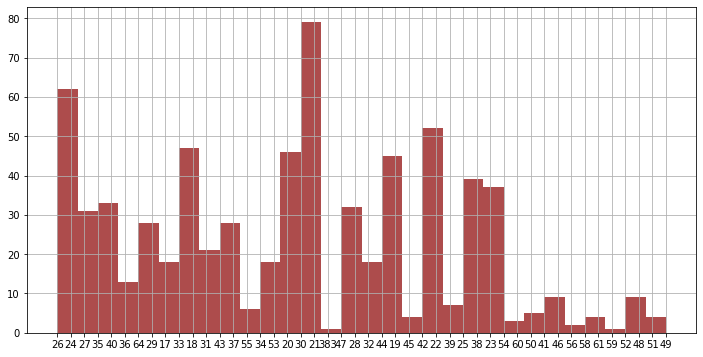

In [8]:
plt.figure(figsize=(12,6))
autism_df['age'].hist(bins=30,color='darkred',alpha=0.7)

In [9]:
autism_df['age']=autism_df['age'].apply(lambda x:float(x))
autism_df['age'].describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

In [10]:
autism_df.loc[autism_df.age == 383, 'age'] = 38

In [11]:
autism_df['age'].mean()

29.206552706552706

In [12]:
autism_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class_ASD'],
      dtype='object')

In [13]:
total = len(autism_df.index)
positive = len(autism_df[autism_df['Class_ASD']=="YES"])
negative = len(autism_df[autism_df['Class_ASD']=="NO"])

print ("Total number of records: {}".format(total))
print( "Total number of positive autism cases:{}".format(positive))
print( "Total number of negative autism cases:{}".format(negative))

Total number of records: 704
Total number of positive autism cases:189
Total number of negative autism cases:515


In [14]:
autism_df['age'] = autism_df['age'].fillna(0).astype(int)
autism_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,17,m,White-European,no,no,Canada,no,3,'18 and more',Self,NO
700,0,0,0,0,0,0,0,1,0,0,56,m,NaN,no,no,Iraq,no,1,'18 and more',NaN,NO
701,0,0,1,0,0,0,1,1,0,0,50,f,'Middle Eastern ',no,no,'New Zealand',no,3,'18 and more',Parent,NO
702,0,0,0,0,1,0,0,0,0,0,31,f,Asian,yes,no,India,no,1,'18 and more',Self,NO


In [15]:
autism_df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

In [16]:
asd_raw = autism_df['Class_ASD']
features_raw = autism_df[['age', 'gender', 'ethnicity', 'autism', 'country_of_res', 'result',
                      'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score','age_desc','used_app_before','relation','jaundice']]

In [17]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']
features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,autism,country_of_res,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age_desc,used_app_before,relation,jaundice
0,0.406250,f,White-European,no,'United States',0.6,1,1,1,1,0,0,1,1,0,0,'18 and more',no,Self,no
1,0.375000,m,Latino,yes,Brazil,0.5,1,1,0,1,0,0,0,1,0,1,'18 and more',no,Self,no
2,0.421875,m,Latino,yes,Spain,0.8,1,1,0,1,1,0,1,1,1,1,'18 and more',no,Parent,yes
3,0.546875,f,White-European,yes,'United States',0.6,1,1,0,1,0,0,1,1,0,1,'18 and more',no,Self,no
4,0.625000,f,NaN,no,Egypt,0.2,1,0,0,0,0,0,0,1,0,0,'18 and more',no,NaN,no


In [18]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,autism_no,autism_yes,country_of_res_'Costa Rica',country_of_res_'Czech Republic',country_of_res_'Hong Kong',country_of_res_'New Zealand',country_of_res_'Saudi Arabia',country_of_res_'Sierra Leone',country_of_res_'South Africa',country_of_res_'Sri Lanka',country_of_res_'United Arab Emirates',country_of_res_'United Kingdom',country_of_res_'United States',country_of_res_'Viet Nam',country_of_res_Afghanistan,...,country_of_res_Iceland,country_of_res_India,country_of_res_Indonesia,country_of_res_Iran,country_of_res_Iraq,country_of_res_Ireland,country_of_res_Italy,country_of_res_Japan,country_of_res_Jordan,country_of_res_Kazakhstan,country_of_res_Lebanon,country_of_res_Malaysia,country_of_res_Mexico,country_of_res_Nepal,country_of_res_Netherlands,country_of_res_Nicaragua,country_of_res_Niger,country_of_res_Oman,country_of_res_Pakistan,country_of_res_Philippines,country_of_res_Portugal,country_of_res_Romania,country_of_res_Russia,country_of_res_Serbia,country_of_res_Spain,country_of_res_Sweden,country_of_res_Tonga,country_of_res_Turkey,country_of_res_Ukraine,country_of_res_Uruguay,age_desc_'18 and more',used_app_before_no,used_app_before_yes,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self,jaundice_no,jaundice_yes
0,0.406250,0.6,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
1,0.375000,0.5,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
2,0.421875,0.8,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1
3,0.546875,0.6,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
4,0.625000,0.2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [19]:
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
encoded

['age',
 'result',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'gender_f',
 'gender_m',
 "ethnicity_'Middle Eastern '",
 "ethnicity_'South Asian'",
 'ethnicity_Asian',
 'ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Latino',
 'ethnicity_Others',
 'ethnicity_Pasifika',
 'ethnicity_Turkish',
 'ethnicity_White-European',
 'ethnicity_others',
 'autism_no',
 'autism_yes',
 "country_of_res_'Costa Rica'",
 "country_of_res_'Czech Republic'",
 "country_of_res_'Hong Kong'",
 "country_of_res_'New Zealand'",
 "country_of_res_'Saudi Arabia'",
 "country_of_res_'Sierra Leone'",
 "country_of_res_'South Africa'",
 "country_of_res_'Sri Lanka'",
 "country_of_res_'United Arab Emirates'",
 "country_of_res_'United Kingdom'",
 "country_of_res_'United States'",
 "country_of_res_'Viet Nam'",
 'country_of_res_Afghanistan',
 'country_of_res_AmericanSamoa',
 'country_of_res_Angola',
 'country_of_res_Argentina',
 'countr

Text(0, 0.5, 'Frequency')

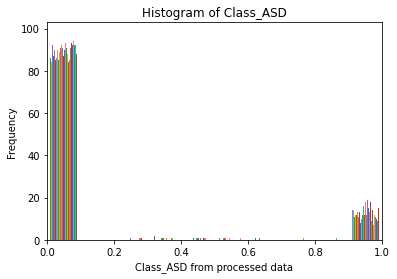

In [20]:
# histogram of Class_ASD
plt.hist(features_final, bins=10)
# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class_ASD')
plt.xlabel('Class_ASD from processed data')
plt.ylabel('Frequency')

In [21]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)
# Show the results of the split
print(X_test.shape[0])
print(X_train.shape[0])


141
563


In [22]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)
# TODO: Initialize the classifier
clf = SVC(random_state = 1)
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
# Get the estimator
best_clf = grid_fit.best_estimator_
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
# Report the before-and-afterscores
print(accuracy_score(y_test, predictions))
print(fbeta_score(y_test, predictions, beta = 0.5))
print(accuracy_score(y_test, best_predictions))
print(fbeta_score(y_test, best_predictions, beta = 0.5))


0.9645390070921985
0.9424083769633506
1.0
1.0


In [23]:
#Scaling the train data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
#import libraries
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import linear_model, metrics, model_selection


In [25]:
#L1 regression
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(LogisticRegression(C=1,penalty='l1',solver='liblinear'))
sel.fit(scaler.transform(X_train),y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [26]:
print('Total features-->',X_train.shape[1])
print('Selected featurs-->',sum(sel.get_support()))
print('Removed featurs-->',np.sum(sel.estimator_.coef_==0))

Total features--> 104
Selected featurs--> 32
Removed featurs--> 72


In [27]:
def RandomForest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [28]:
X_train_lasso=sel.transform(X_train)
X_test_lasso=sel.transform(X_test)
RandomForest(X_train_lasso,X_test_lasso,y_train,y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 1.0


In [29]:
#L2 Regression
sfm=SelectFromModel(LogisticRegression(C=1,penalty='l2'))
sfm.fit(scaler.transform(X_train),y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [30]:
print('Total features-->',X_train.shape[1])
print('Selected featurs-->',sum(sfm.get_support()))
print('Removed featurs-->',np.sum(sfm.estimator_.coef_==0))

Total features--> 104
Selected featurs--> 20
Removed featurs--> 8


In [31]:
X_train_l2=sel.transform(X_train)
X_test_l2=sel.transform(X_test)
RandomForest(X_train_l2,X_test_l2,y_train,y_test)

Train set
Random Forests roc-auc: 1.0
Test set
Random Forests roc-auc: 1.0


In [32]:
#Different Models 
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    return basedModels


In [33]:
#K Fold
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)    
    return names, results

In [34]:
SEED =1234
np.random.seed(SEED)
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)


LR: 0.987531 (0.013935)
LDA: 0.932456 (0.022409)
KNN: 0.948528 (0.024349)
CART: 1.000000 (0.000000)
NB: 0.310714 (0.030647)
SVM: 0.966228 (0.016865)
AB: 1.000000 (0.000000)
GBM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
ET: 0.984085 (0.014589)


In [35]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
        return float(prc.format(f_val))
    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))
    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame


In [36]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,LR,0.9875
1,LDA,0.9325
2,KNN,0.9485
3,CART,1.0000
4,NB,0.3107
5,SVM,0.9662
6,AB,1.0000
7,GBM,1.0000
8,RF,1.0000
9,ET,0.9841


In [37]:
# Using Pipeline
def GetScaledModel(nameOfScaler):
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    return pipelines 

In [38]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.973371 (0.024209)
standardLDA: 0.932456 (0.022409)
standardKNN: 0.889850 (0.020939)
standardCART: 1.000000 (0.000000)
standardNB: 0.310714 (0.030647)
standardSVM: 0.914693 (0.026283)
standardAB: 1.000000 (0.000000)
standardGBM: 1.000000 (0.000000)
standardRF: 1.000000 (0.000000)
standardET: 0.982268 (0.013672)


,Model,Score,Model,Score
0,LR,0.9875,standardLR,0.9734
1,LDA,0.9325,standardLDA,0.9325
2,KNN,0.9485,standardKNN,0.8898
3,CART,1.0000,standardCART,1.0000
4,NB,0.3107,standardNB,0.3107
5,SVM,0.9662,standardSVM,0.9147
6,AB,1.0000,standardAB,1.0000
7,GBM,1.0000,standardGBM,1.0000
8,RF,1.0000,standardRF,1.0000
9,ET,0.9841,standardET,0.9823


In [39]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.987531 (0.013935)
minmaxLDA: 0.932456 (0.022409)
minmaxKNN: 0.948528 (0.024349)
minmaxCART: 1.000000 (0.000000)
minmaxNB: 0.310714 (0.030647)
minmaxSVM: 0.966228 (0.016865)
minmaxAB: 1.000000 (0.000000)
minmaxGBM: 1.000000 (0.000000)
minmaxRF: 1.000000 (0.000000)
minmaxET: 0.987625 (0.011278)


,Model,Score,Model,Score,Model,Score
0,LR,0.9875,standardLR,0.9734,minmaxLR,0.9875
1,LDA,0.9325,standardLDA,0.9325,minmaxLDA,0.9325
2,KNN,0.9485,standardKNN,0.8898,minmaxKNN,0.9485
3,CART,1.0000,standardCART,1.0000,minmaxCART,1.0000
4,NB,0.3107,standardNB,0.3107,minmaxNB,0.3107
5,SVM,0.9662,standardSVM,0.9147,minmaxSVM,0.9662
6,AB,1.0000,standardAB,1.0000,minmaxAB,1.0000
7,GBM,1.0000,standardGBM,1.0000,minmaxGBM,1.0000
8,RF,1.0000,standardRF,1.0000,minmaxRF,1.0000
9,ET,0.9841,standardET,0.9823,minmaxET,0.9876


In [40]:
#USING GINI
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
y_pred_gini = clf_gini.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [43]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [44]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [45]:
#Using ENTROPY
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
y_pred_en = clf_en.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


In [48]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [49]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[102   0]
 [  0  39]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        39

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



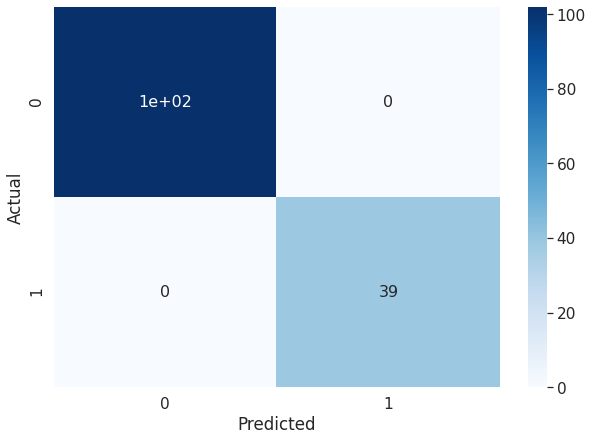

In [52]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, y_pred_en)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [53]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [54]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [8.49921392e-01 4.80354721e+01 1.40314629e+01 3.10599546e+01
 5.81459058e+01 6.02054569e+01 8.47982037e+01 1.28422083e+02
 3.70776047e+01 1.14111958e+01 1.49718560e+02 3.85242657e+01
 1.86424409e+00 1.68159855e+00 1.53132580e+01 5.44763980e+00
 1.07362920e+01 2.74520557e+00 8.99937225e-02 6.01556189e+00
 8.45526169e-01 1.41722195e+00 1.45278450e+00 4.44402085e+01
            nan 2.86027652e+00 1.91991164e+01 3.63196126e-01
 3.63196126e-01 3.63196126e-01 3.20214718e+00 5.52461663e-03
            nan 5.50666667e+00 2.90556901e+00 1.93196172e+01
 3.85990315e+00 2.36620841e+01 1.12894270e-01 1.73390417e+00
            nan 3.63196126e-01 5.58264730e-01 3.63196126e-01
 3.63196126e-01 1.01124081e+00 5.58264730e-01            nan
 3.63196126e-01 6.87059457e-02 6.87059457e-02 3.63196126e-01
 2.84655690e+00            nan 9.61820985e+00 3.63196126e-01
 2.75333333e+00 2.75333333e+00 3.63196126e-01 1.08958838e+00
 7.26392252e-01 2.75333333e+00 2.79132365e+00 2.45884315e+00
 7.26392252e

Accuracy is:  0.9290780141843972


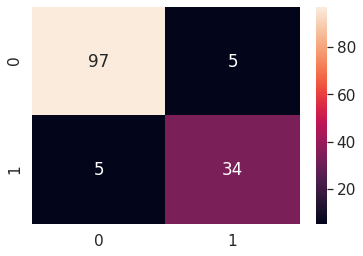

In [55]:
x_train_2 = select_feature.transform(X_train)
x_test_2 = select_feature.transform(X_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [56]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [57]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['result', 'A4_Score', 'A5_Score', 'A6_Score', 'A9_Score'], dtype='object')


In [58]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])


Optimal number of features : 1
Best features : Index(['result'], dtype='object')


In [59]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.352928)
2. feature 10 (0.119109)
3. feature 7 (0.080656)
4. feature 6 (0.059634)
5. feature 5 (0.053925)
6. feature 4 (0.052459)
7. feature 11 (0.033490)
8. feature 8 (0.027132)
9. feature 2 (0.023639)
10. feature 0 (0.022259)
11. feature 3 (0.021891)
12. feature 23 (0.017190)
13. feature 9 (0.017086)
14. feature 37 (0.011156)
15. feature 25 (0.006416)
16. feature 13 (0.005829)
17. feature 16 (0.005812)
18. feature 14 (0.005530)
19. feature 101 (0.005366)
20. feature 65 (0.005306)
21. feature 26 (0.004978)
22. feature 19 (0.004366)
23. feature 35 (0.004193)
24. feature 12 (0.003719)
25. feature 54 (0.003474)
26. feature 36 (0.003219)
27. feature 20 (0.002914)
28. feature 103 (0.002779)
29. feature 30 (0.002777)
30. feature 72 (0.002509)
31. feature 17 (0.002326)
32. feature 99 (0.002051)
33. feature 75 (0.001915)
34. feature 102 (0.001906)
35. feature 95 (0.001796)
36. feature 62 (0.001766)
37. feature 100 (0.001634)
38. feature 86 (0.001616)
39. featur

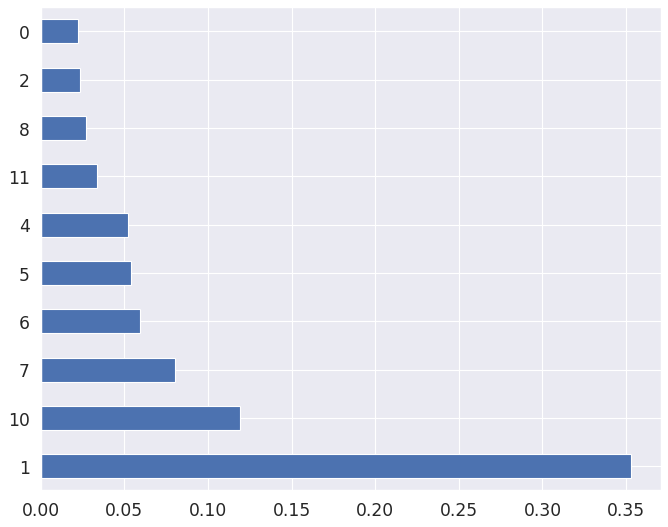

In [60]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clr_rf_5.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')

In [61]:
#SGD Classifier grid searchCV
grid_search = model_selection.GridSearchCV(
    estimator=linear_model.SGDClassifier(loss='log', tol=-np.inf, class_weight='balanced'),
    param_grid={'alpha': [0.1, 0.3],
                'max_iter': [10000, 15000]},
    cv=10,
    return_train_score=True)
grid_search.fit(X_train, y_train)
def evaluate(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = metrics.accuracy_score(y_train,train_preds)
    test_acc = metrics.accuracy_score(y_test,test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
best_alpha = grid_search.best_params_['alpha']
best_max_iter = grid_search.best_params_['max_iter']
print('Best alpha: %s' % best_alpha)
print('Best max_iter: %s' % best_max_iter)
best_model = linear_model.SGDClassifier(
    loss='log', tol=-np.inf, class_weight='balanced', alpha=best_alpha, max_iter=best_max_iter)
best_model.fit(X_train, y_train)
evaluate(best_model, X_train, y_train, X_test, y_test)

Best alpha: 0.1
Best max_iter: 15000
Train accuracy: 0.9591474245115453
Test accuracy: 0.9290780141843972


In [62]:
r = pd.DataFrame(grid_search.cv_results_)
# we only want a subset of the columns for a precise summary
r[['params', 'mean_train_score', 'mean_test_score']].head()

,params,mean_train_score,mean_test_score
0,"{'alpha': 0.1, 'max_iter': 10000}",0.961318,0.955608
1,"{'alpha': 0.1, 'max_iter': 15000}",0.961910,0.957362
2,"{'alpha': 0.3, 'max_iter': 10000}",0.945131,0.944987
3,"{'alpha': 0.3, 'max_iter': 15000}",0.946317,0.946773


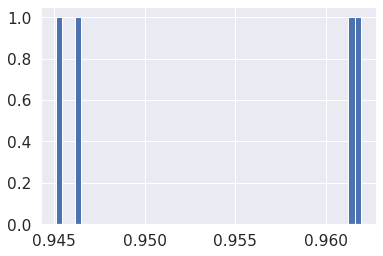

In [65]:
plt.hist(r.get('mean_train_score'), bins = 50);plt.show()

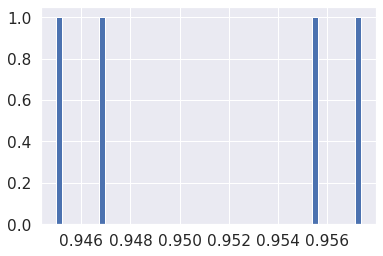

In [66]:
plt.hist(r.get('mean_test_score'), bins = 50);plt.show()